In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
from salishsea_tools import viz_tools

In [30]:
gridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23-precip-runoffs/sss150_1h_20230225_20230225_grid_T.nc')
gridT_norunoff = xr.open_dataset('/data/cstang/MEOPAR/results/sss150/25feb23_norunoff/sss150_1h_20230225_20230225_grid_T.nc')
sss150_rivers = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d25.nc')
sss150_rivers26Feb = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d26.nc')
ssc_rivers = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d25.nc')
ssc_rivers26Feb = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d26.nc')
feb25_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')

In [15]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]
vmask = 1 - mesh.vmask[0]

sss_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
ssc_gridT = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/25feb23/SalishSea_1h_20230225_20230225_grid_T.nc')
mesh_ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD.nc')

In [16]:
gridT

<xarray.Dataset>
Dimensions:               (y: 826, x: 710, nvertex: 4, deptht: 39,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-02-25T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/13)
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    ...                    ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    precip                (time_counter, y, x) float32 ...
    runoffs               (time_counter, y, x) float32 ...
Attributes:
    name:         sss150_1h_20230225_20230225_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2024-Dec-03 20:11:25 GMT
    uuid:         d7a33338-e124-4d5e-8431-853966aa7df5

In [17]:
np.where(gridT.precip>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [19]:
RunoffHS_hr1 = gridT.runoffs[3].where((gridT.runoffs[3] > 0) & (gridT.y > 730), drop=True)
Runoff_hr1 = gridT.runoffs[0].where((gridT.runoffs[0] > 0), drop=True)

RunoffHS_24hr = gridT.runoffs.where((gridT.runoffs > 0) & (gridT.y > 730), drop=True)
Runoff_24hr = gridT.runoffs.where((gridT.runoffs > 0), drop=True)

In [20]:
np.nansum(RunoffHS_hr1)

4.6755986

In [21]:
runoff_TS = np.zeros(24)

for hr in range(24):
    RunoffHS_int = gridT.runoffs[hr].where((gridT.runoffs[hr] > 0) & (gridT.y > 730), drop=True)
    runoff_TS[hr] = np.nansum(RunoffHS_int)

Text(0, 0.5, 'Runoff (kg/m2/s)')

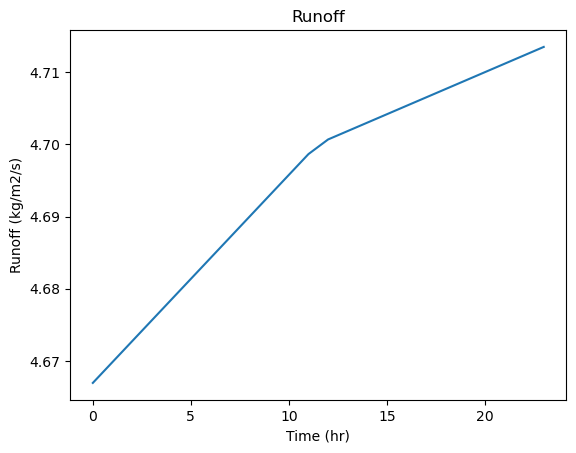

In [22]:
plt.plot(runoff_TS)
plt.title('Runoff')
plt.xlabel('Time (hr)')
plt.ylabel('Runoff (kg/m2/s)')

### River file

In [23]:
sss_FilteredData = sss150_rivers.where((sss150_rivers.y > 730) & (sss150_rivers.rorunoff != 0), drop=True)

sss_HSRunoff = np.nansum(sss_FilteredData.rorunoff[0])
print(sss_HSRunoff)

4.700106590400409


### Find grid resolution

In [24]:
sss_Xres = np.mean(mesh.e1t.values)
sss_Yres = np.mean(mesh.e2t.values)

np.mean(mesh.e2t.values),np.mean(mesh.e1t.values)

(99.32817907706675, 129.55957310341498)

In [25]:
print('runoff (HoweSound):',np.nansum(RunoffHS_hr1)*sss_Xres*sss_Yres,'kg/s')
print('runoff (total):',np.nansum(Runoff_hr1)*sss_Xres*sss_Yres,'kg/s')

runoff (HoweSound): 60169.88814474542 kg/s
runoff (total): 847844.1423397951 kg/s


In [26]:
print('Rivers HS (Feb25):',sss_HSRunoff*sss_Xres*sss_Yres,'kg/s')
print('Rivers all (Feb25):',np.nansum(sss150_rivers.rorunoff)*sss_Xres*sss_Yres,'kg/s')

Rivers HS (Feb25): 60485.27915127258 kg/s
Rivers all (Feb25): 811041.3619073017 kg/s


#### 

Text(0, 0.5, 'Salinity (g/kg)')

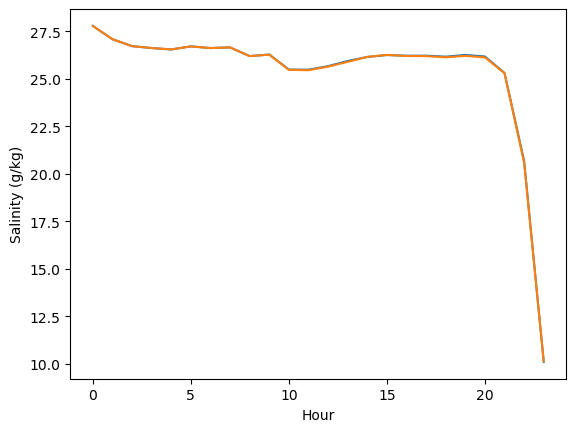

In [72]:
fig,ax = plt.subplots()
ax.plot(gridT_norunoff.time_counter.dt.hour.values,gridT_norunoff.vosaline[:,0,590,140].values)
ax.plot(feb25_GridT.time_counter.dt.hour.values,feb25_GridT.vosaline[:,0,590,140].values)
ax.set_xlabel('Hour')
ax.set_ylabel('Salinity (g/kg)')

#### Compare no runoff to with runoff

Text(0.5, 1.0, 'Diff (no runoff - runoff)')

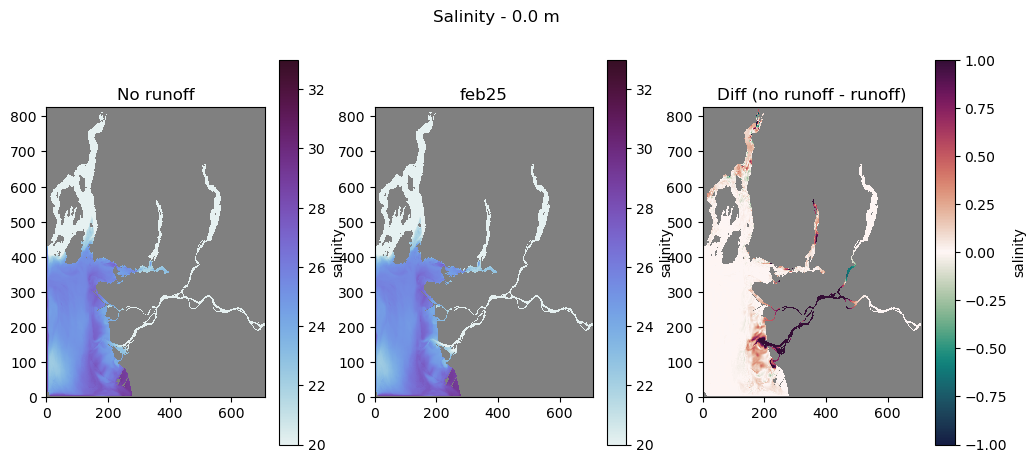

In [66]:
masked_salNR = np.ma.masked_array(gridT_norunoff['vosaline'][23,0], mask=tmask[0])
masked_salD = np.ma.masked_array(feb25_GridT.vosaline[23, 0], mask=tmask[0])


cmap1 = cm.cm.dense
cmap1.set_bad('grey')
cmap2 = cm.cm.curl
cmap2.set_bad('grey')

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_salNR,cmap=cmap1,vmin=20,vmax=33)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle(f'Salinity - {np.round(mesh.gdepw_1d[0,0].values)} m')
ax.set_title('No runoff')


pm = ax1.pcolormesh(masked_salD,cmap=cmap1,vmin=20,vmax=33)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_salNR - masked_salD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff (no runoff - runoff)')

In [68]:
HoweSound = gridT_norunoff.sel(x=slice(0, 200), y=slice(400, 810))
mesh_HS = mesh.sel(x=slice(0, 200), y=slice(400,810))
HoweSound2 = gridT_norunoff.sel(x=slice(100, 200), y=slice(400, 810))
mesh_HS2 = mesh.sel(x=slice(100, 200), y=slice(400,810))

new_ds = mesh_HS.copy()
new_ds = new_ds.assign_coords(x=('x', mesh_HS['x'].values), y=('y', mesh_HS['y'].values))

new_ds2 = mesh_HS2.copy()
new_ds2 = new_ds2.assign_coords(x=('x', mesh_HS2['x'].values), y=('y', mesh_HS2['y'].values))

# Find the deepest point in the channel
DeepPoint_X = new_ds['mbathy'].idxmax(dim='x')  
DP_x = DeepPoint_X[0].values
DP_y = DeepPoint_X.y.values
 
salinityHS_DP = HoweSound.vosaline.isel(x=DP_x, y=DP_y)

# Find the deepest point in the channel
DeepPoint_X2 = new_ds2['mbathy'].idxmax(dim='x')  
DP_x2 = DeepPoint_X2[0].values
DP_y2 = DeepPoint_X2.y.values
 
salinityHS_DP2 = HoweSound2.vosaline.isel(x=DP_x2, y=DP_y2)

In [69]:
ProfilesDict = {}

for ii in range(24):
    
    ProfilesDict[ii] = np.zeros((39,410))
    
    for jj in range(len(DP_x)):
        ProfilesDict[ii][:,jj] = HoweSound.vosaline[ii,:,DP_y[jj],DP_x[jj]].values

Text(0.5, 0.98, 'Through Howe Sound - no runoff')

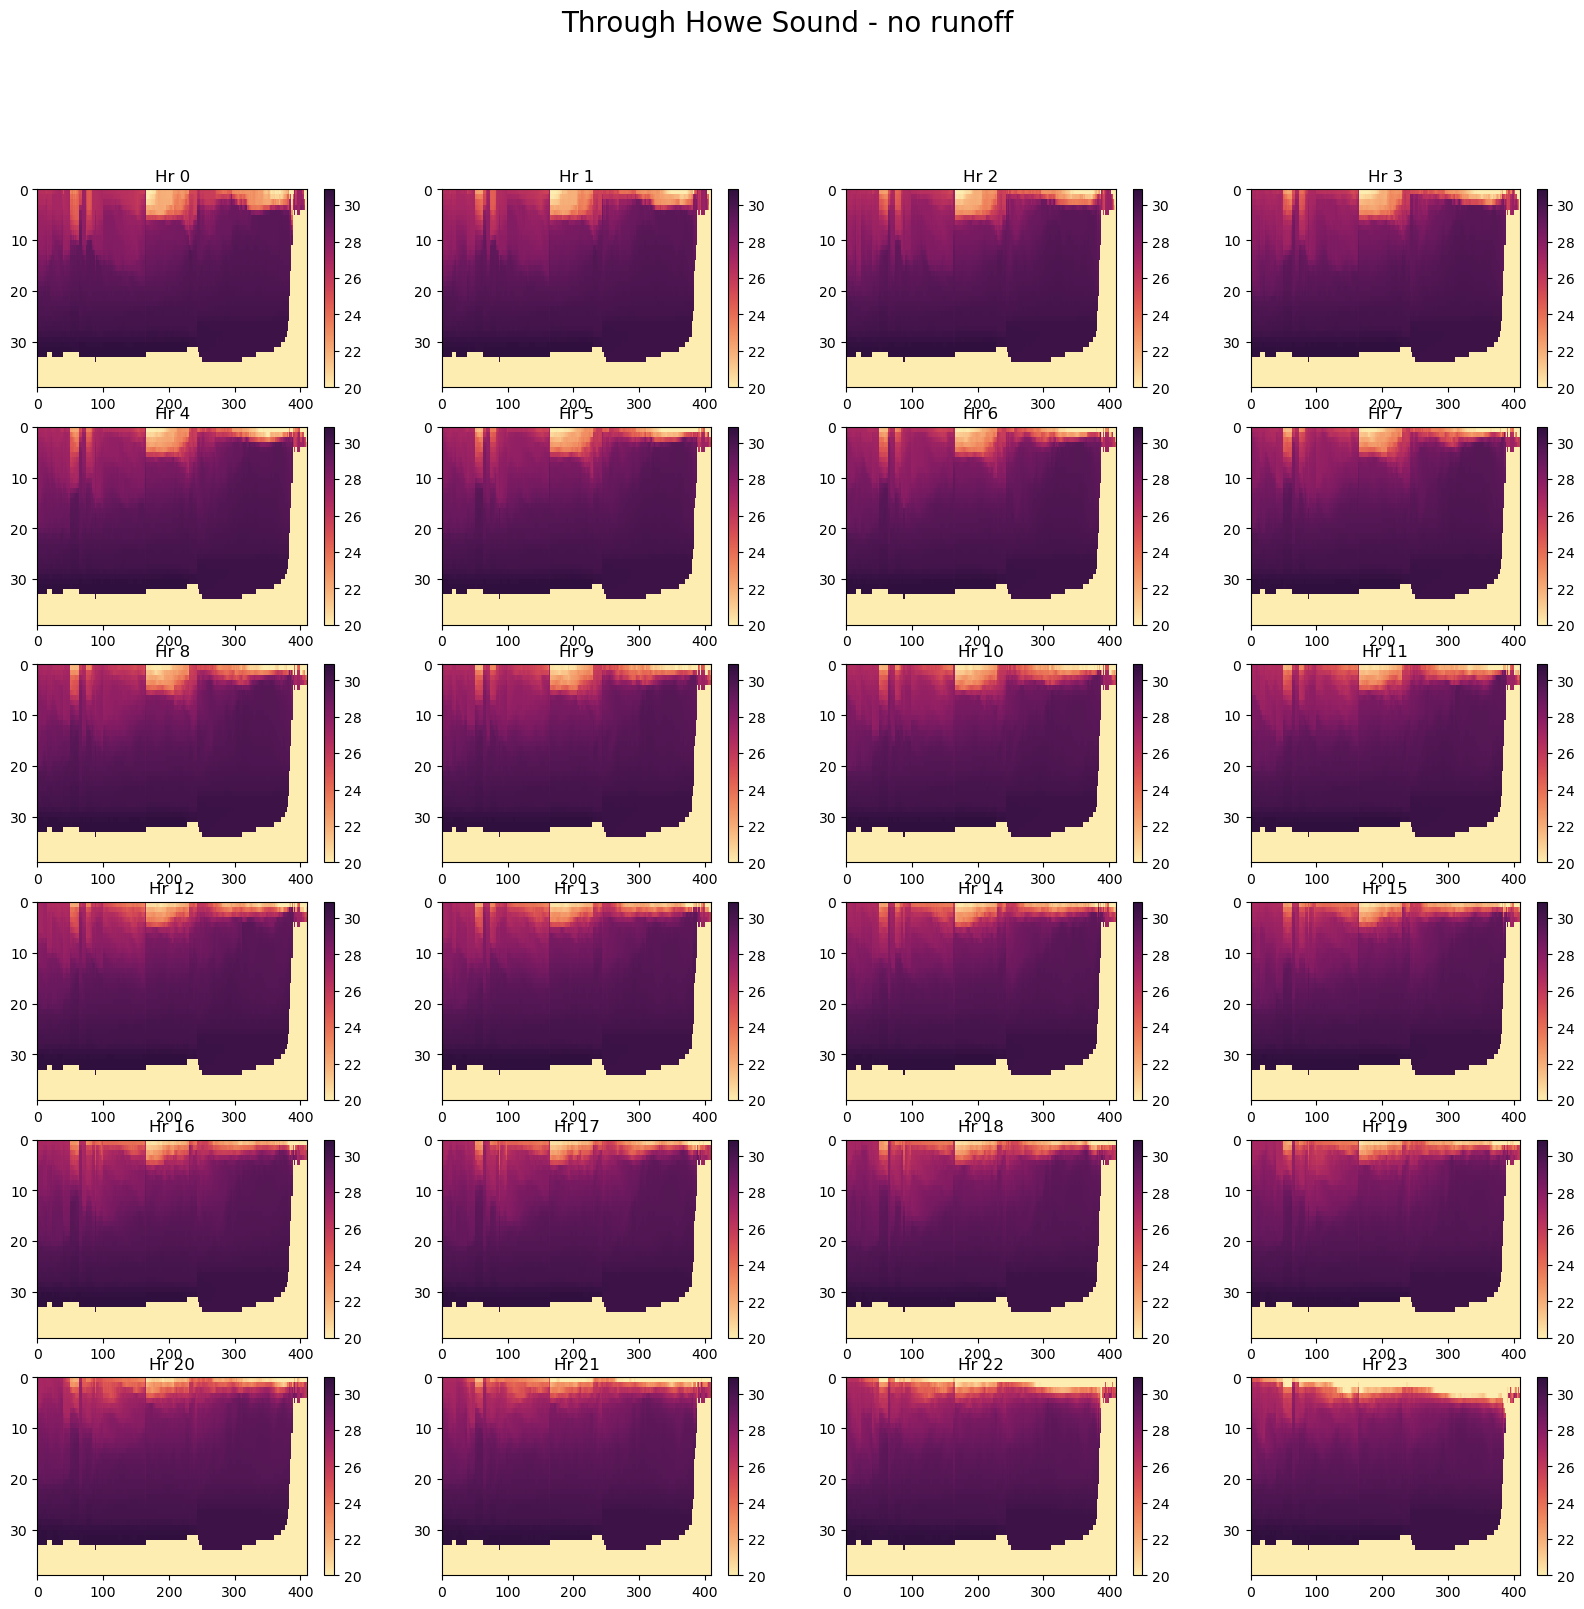

In [84]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(20, 18))

# date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for ii in range(nrows):
    for jj in range(ncols):
        pc = ax[ii,jj].pcolormesh(ProfilesDict[ncols*ii+jj],cmap=cm.cm.matter,vmin=20)
        ax[ii,jj].invert_yaxis()
        fig.colorbar(pc)
        ax[ii,jj].set_title(f'Hr {feb25_GridT.time_counter.dt.hour.values[ncols*ii+jj]}')
        
fig.suptitle('Through Howe Sound - no runoff',fontsize=20)